In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import pandas as pd
import os
import wandb

In [2]:
api = wandb.Api()
entity = "jkratz-carnegie-mellon-university"

# List all projects under your account
# projects = api.projects(entity)

# for project in projects:
#     print(f"Project: {project.name}, Entity: {project.entity}")

## Stochastic nutrient profile

Todo:
- plot correlation with proteome dynamics

### T=6

In [20]:
# choose project
project = "framestack_corrTest_wNoise_wProtwGrowthCor"

# download only specific runs and metrics
filters = {
    "state": "finished",
    "config.T": {"$eq": 6}}

metrics_to_download = ["fixed_lag_cross_corr_short", "fixed_lag_cross_corr_long", "ave_total_reward", "ave_max_cross_corr_kn0", "ave_corr_lag_kn0"]

In [21]:
runs = api.runs(f"{entity}/{project}", filters=filters)

results_folder = f"wandb_downloads/{project}/{filters['config.T']['$eq']}"
os.makedirs(results_folder, exist_ok=True)

for run in runs:
    print(f"Downloading metrics for Run ID: {run.id}")

    # Fetch only selected metrics
    history = run.history(keys=metrics_to_download)

    # Save to CSV
    history.to_csv(f"{results_folder}/{run.id}.csv", index=False)

print("Download complete.")

Download complete.


In [22]:
# import results and concatenate

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]

# Load and concatenate them
df_list = []  # Store individual dataframes

for file in csv_files:
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
    df_list.append(df)

# Combine all dataframes into one
df = pd.concat(df_list, ignore_index=True)

In [23]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["fixed_lag_cross_corr_short"], df["ave_total_reward"])
corr_coef = np.round(corr_coef[0,1], 3)

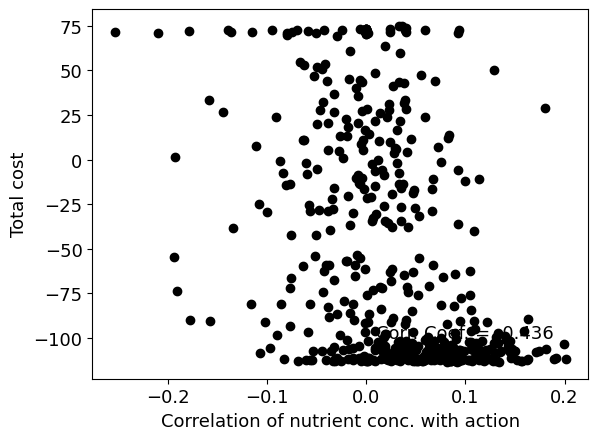

In [24]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["fixed_lag_cross_corr_short"], df["ave_total_reward"], color='k')
plt.xlabel("Correlation of nutrient conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.01,-100))
plt.show()
# fig.savefig('nutr_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

In [25]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["fixed_lag_cross_corr_long"], df["ave_total_reward"])
corr_coef = np.round(corr_coef[0,1], 3)

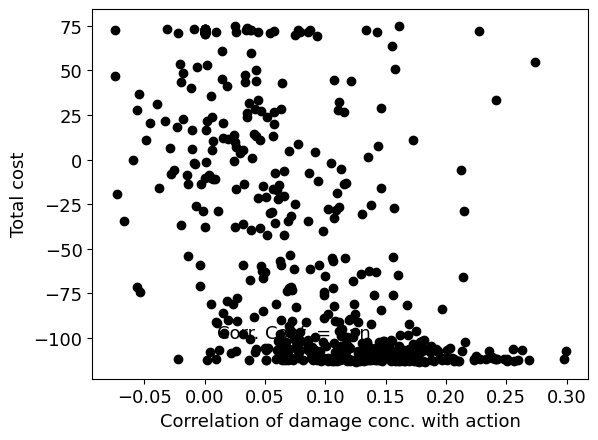

In [26]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["fixed_lag_cross_corr_long"], df["ave_total_reward"], color='k')
plt.xlabel("Correlation of damage conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.01,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

In [29]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_corr_lag_kn0"], df["ave_total_reward"])
corr_coef = np.round(corr_coef[0,1], 3)

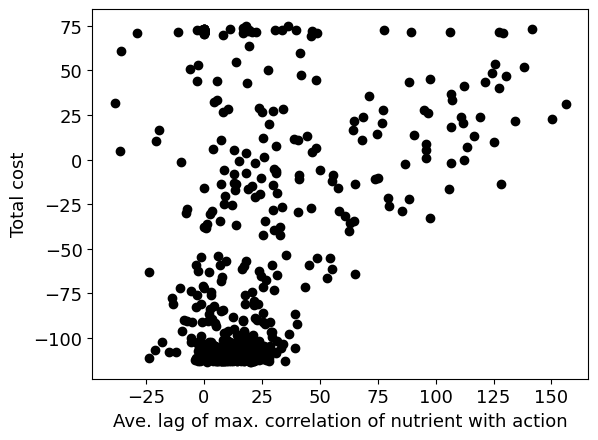

In [32]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_corr_lag_kn0"], df["ave_total_reward"], color='k')
plt.xlabel("Ave. lag of max. correlation of nutrient with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(-140,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

In [33]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_kn0"], df["ave_total_reward"])
corr_coef = np.round(corr_coef[0,1], 3)

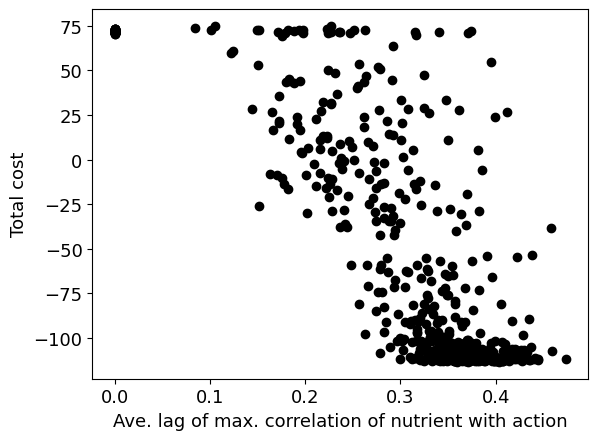

In [34]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_kn0"], df["ave_total_reward"], color='k')
plt.xlabel("Ave. lag of max. correlation of nutrient with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(-140,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

### T=12

In [62]:
# choose project
project = "framestack_corrTest_wNoise_wProtwGrowthCor"

# download only specific runs and metrics
filters = {
    "state": "finished",
    "config.T": {"$eq": 12}}

metrics_to_download = ["fixed_lag_cross_corr_short", "fixed_lag_cross_corr_long", "ave_total_reward", "ave_max_cross_corr_kn0", "ave_corr_lag_kn0"]

In [63]:
runs = api.runs(f"{entity}/{project}", filters=filters)

results_folder = f"wandb_downloads/{project}/{filters['config.T']['$eq']}"
os.makedirs(results_folder, exist_ok=True)

for run in runs:
    print(f"Downloading metrics for Run ID: {run.id}")

    # Fetch only selected metrics
    history = run.history(keys=metrics_to_download)

    # Save to CSV
    history.to_csv(f"{results_folder}/{run.id}.csv", index=False)

print("Download complete.")

Download complete.


In [64]:
# import results and concatenate

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]

# Load and concatenate them
df_list = []  # Store individual dataframes

for file in csv_files:
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
    df_list.append(df)

# Combine all dataframes into one
df = pd.concat(df_list, ignore_index=True)

In [65]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["fixed_lag_cross_corr_short"], df["ave_total_reward"])
corr_coef = np.round(corr_coef[0,1], 3)

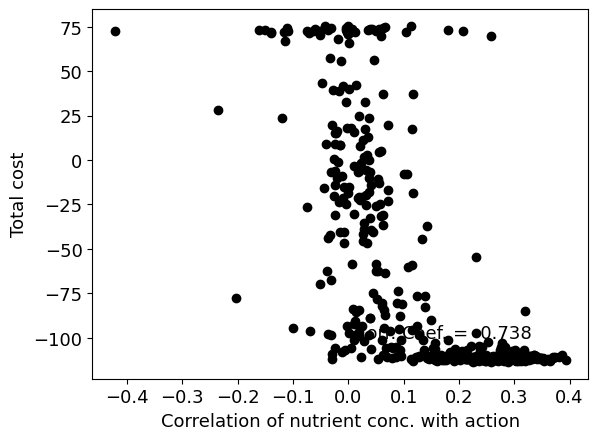

In [66]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["fixed_lag_cross_corr_short"], df["ave_total_reward"], color='k')
plt.xlabel("Correlation of nutrient conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.01,-100))
plt.show()
# fig.savefig('nutr_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

In [67]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["fixed_lag_cross_corr_long"], df["ave_total_reward"])
corr_coef = np.round(corr_coef[0,1], 3)

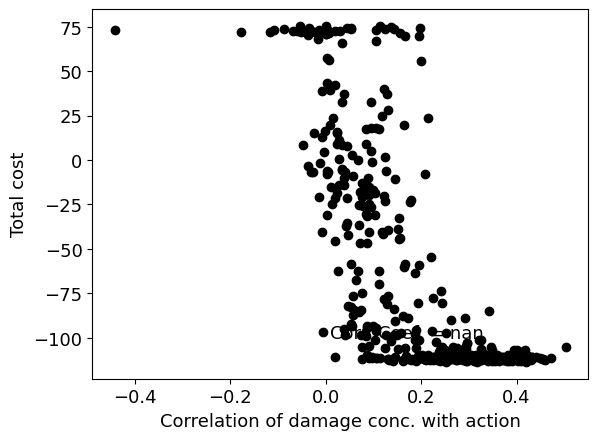

In [68]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["fixed_lag_cross_corr_long"], df["ave_total_reward"], color='k')
plt.xlabel("Correlation of damage conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.01,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

In [69]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_corr_lag_kn0"], df["ave_total_reward"])
corr_coef = np.round(corr_coef[0,1], 3)

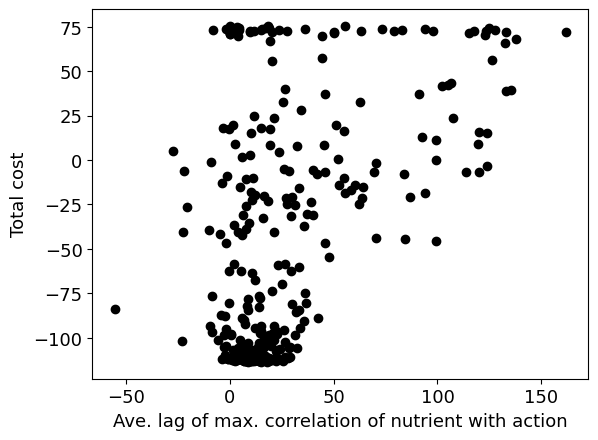

In [70]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_corr_lag_kn0"], df["ave_total_reward"], color='k')
plt.xlabel("Ave. lag of max. correlation of nutrient with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(-140,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

Considering just one run

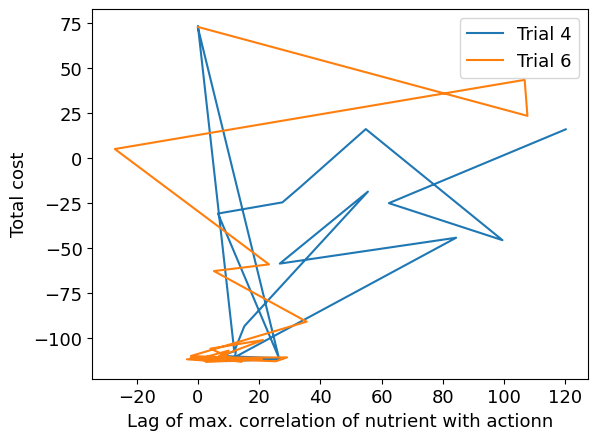

In [71]:
index = [4, 6] #4, 6

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]
csv_files = [csv_files[i] for i in index]

fig = plt.figure()

for file, i in zip(csv_files, index):
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV

    plt.plot(df["ave_corr_lag_kn0"], df["ave_total_reward"], label='Trial '+str(i))
plt.rcParams.update({"font.size": 13})

plt.xlabel("Lag of max. correlation of nutrient with actionn")
plt.ylabel("Total cost")
plt.legend()
plt.show()
fig.savefig('nutr_vs_cost_plot-detr_12T-2examp_lag.pdf', dpi=300, bbox_inches='tight')

end single run plot

In [50]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_kn0"], df["ave_total_reward"])
corr_coef = np.round(corr_coef[0,1], 3)

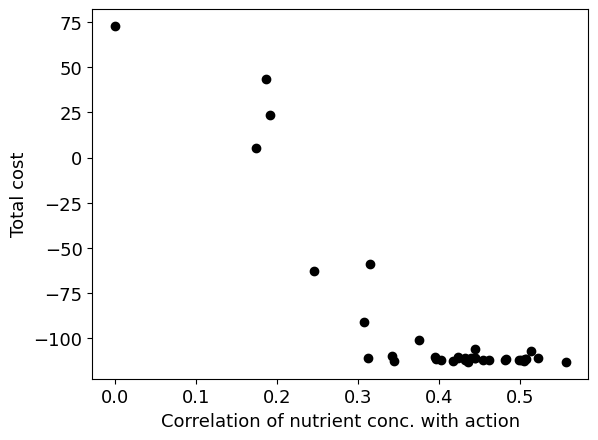

In [51]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_kn0"], df["ave_total_reward"], color='k')
plt.xlabel("Correlation of nutrient conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(-140,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

Considering just one run

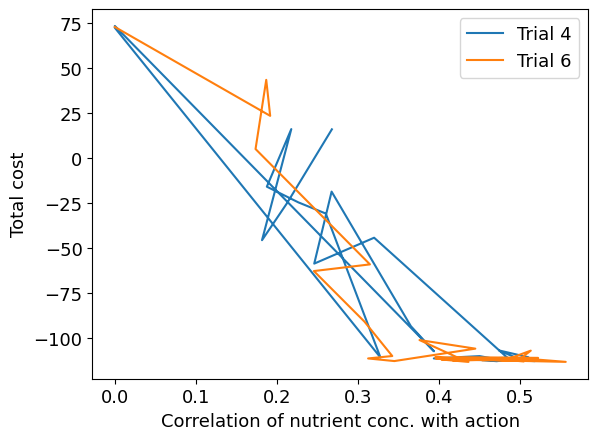

In [72]:
index = [4,6] #4, 6

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]
csv_files = [csv_files[i] for i in index]

fig = plt.figure()

for file, i in zip(csv_files, index):
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV

    plt.plot(df["ave_max_cross_corr_kn0"], df["ave_total_reward"], label='Trial '+str(i))
plt.rcParams.update({"font.size": 13})

plt.xlabel("Correlation of nutrient conc. with action")
plt.ylabel("Total cost")
plt.legend()
plt.show()
fig.savefig('nutr_vs_cost_plot-detr_12T-2examp.pdf', dpi=300, bbox_inches='tight')

end single run plot

### T=18

In [18]:
# choose project
project = "framestack_corrTest_wNoise_wProtwGrowthCor"

# download only specific runs and metrics
filters = {
    "state": "finished",
    "config.T": {"$eq": 18}}

metrics_to_download = ["fixed_lag_cross_corr_short", "fixed_lag_cross_corr_long", "ave_total_reward", "ave_max_cross_corr_kn0", "ave_corr_lag_kn0"]

In [19]:
runs = api.runs(f"{entity}/{project}", filters=filters)

results_folder = f"wandb_downloads/{project}/{filters['config.T']['$eq']}"
os.makedirs(results_folder, exist_ok=True)

for run in runs:
    print(f"Downloading metrics for Run ID: {run.id}")

    # Fetch only selected metrics
    history = run.history(keys=metrics_to_download)

    # Save to CSV
    history.to_csv(f"{results_folder}/{run.id}.csv", index=False)

print("Download complete.")

Download complete.


In [20]:
# import results and concatenate

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]

# Load and concatenate them
df_list = []  # Store individual dataframes

for file in csv_files:
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
    df_list.append(df)

# Combine all dataframes into one
df = pd.concat(df_list, ignore_index=True)

In [21]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["fixed_lag_cross_corr_short"], df["ave_total_reward"])
corr_coef = np.round(corr_coef[0,1], 3)

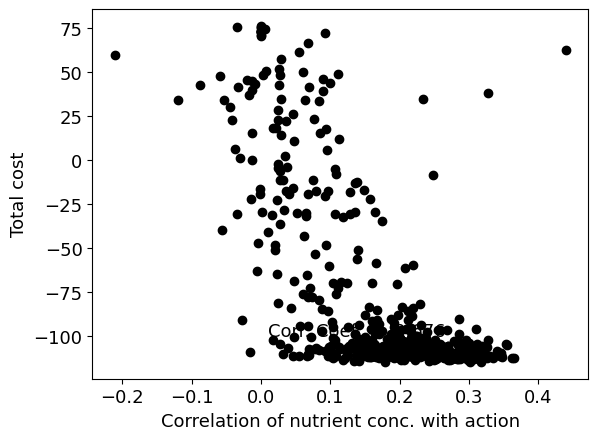

In [22]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["fixed_lag_cross_corr_short"], df["ave_total_reward"], color='k')
plt.xlabel("Correlation of nutrient conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.01,-100))
plt.show()
# fig.savefig('nutr_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

In [23]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["fixed_lag_cross_corr_long"], df["ave_total_reward"])
corr_coef = np.round(corr_coef[0,1], 3)

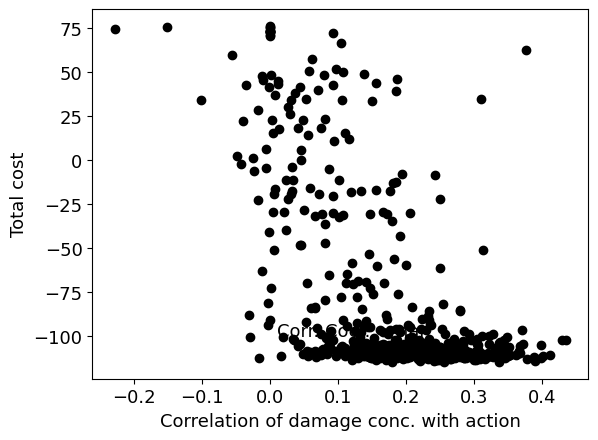

In [24]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["fixed_lag_cross_corr_long"], df["ave_total_reward"], color='k')
plt.xlabel("Correlation of damage conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.01,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

In [25]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_corr_lag_kn0"], df["ave_total_reward"])
corr_coef = np.round(corr_coef[0,1], 3)

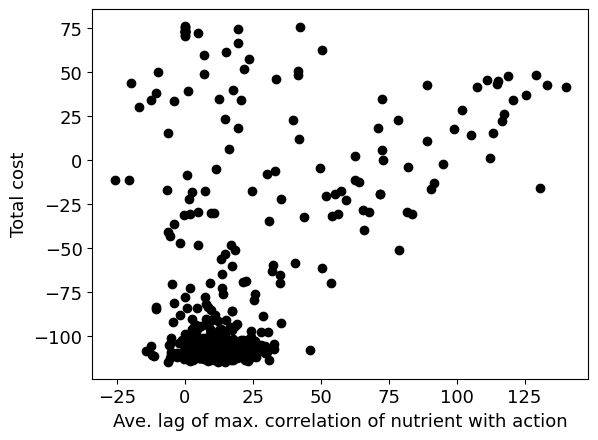

In [26]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_corr_lag_kn0"], df["ave_total_reward"], color='k')
plt.xlabel("Ave. lag of max. correlation of nutrient with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(-140,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

In [27]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_kn0"], df["ave_total_reward"])
corr_coef = np.round(corr_coef[0,1], 3)

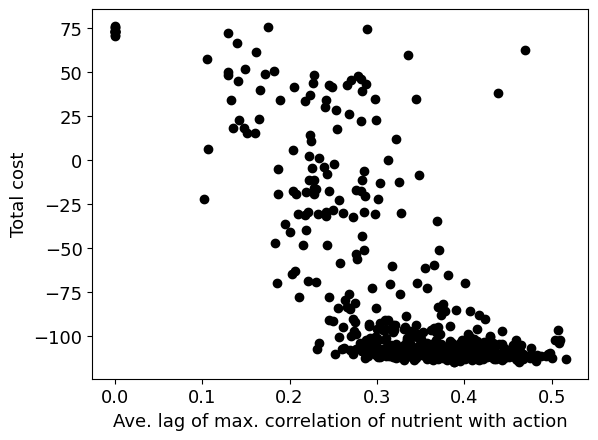

In [28]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_kn0"], df["ave_total_reward"], color='k')
plt.xlabel("Ave. lag of max. correlation of nutrient with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(-140,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

### T=12

In [3]:
# choose project
project = "framestack_corrTest_wNoise"

# download only specific runs and metrics
filters = {
    "state": "finished",
    "config.T": {"$eq": 12}}

metrics_to_download = ["ave_max_cross_corr_kn0", "ave_max_cross_corr_U", "ave total reward", "extinct_fraction", "ave_corr_lag_kn0"]

In [4]:
runs = api.runs(f"{entity}/{project}", filters=filters)

results_folder = f"wandb_downloads/{project}/{filters['config.T']['$eq']}"
os.makedirs(results_folder, exist_ok=True)

for run in runs:
    print(f"Downloading metrics for Run ID: {run.id}")

    # Fetch only selected metrics
    history = run.history(keys=metrics_to_download)

    # Save to CSV
    history.to_csv(f"{results_folder}/{run.id}.csv", index=False)

print("Download complete.")

Download complete.


Start plotting training dynamics

In [5]:
# import results and concatenate

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]

# Load and concatenate them
df_cat = pd.DataFrame([])  # Store individual dataframes

for file in csv_files:
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
    df_cat = pd.concat((df_cat,df['ave total reward']), axis=1)

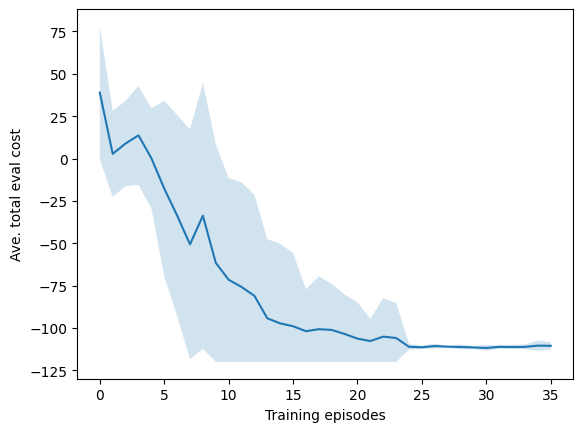

In [6]:
df_mean = df_cat.mean(axis=1)
df_std = df_cat.std(axis=1)

# plt.plot(df_cat)
plt.plot(df_mean)
plt.fill_between(range(len(df_mean)), np.maximum(df_mean - df_std,-120), df_mean + df_std, alpha=0.2)
plt.ylabel('Ave. total eval cost')
plt.xlabel('Training episodes')
plt.show()

In [7]:
# import results and concatenate

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]

# Load and concatenate them
df_cat = pd.DataFrame([])  # Store individual dataframes

for file in csv_files:
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
    df_cat = pd.concat((df_cat,df['extinct_fraction']), axis=1)

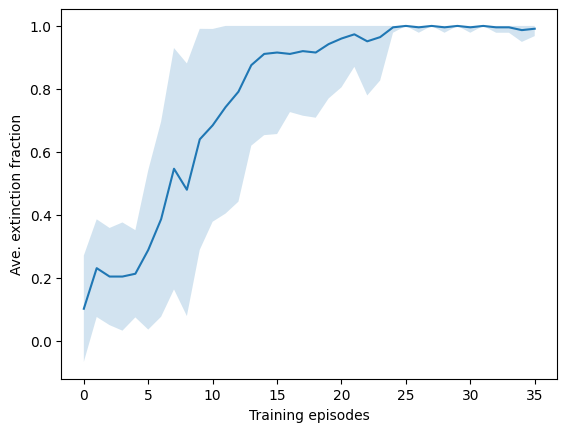

In [8]:
df_mean = df_cat.mean(axis=1)
df_std = df_cat.std(axis=1)

# plt.plot(df_cat)
plt.plot(df_mean)
plt.fill_between(range(len(df_mean)), df_mean - df_std, np.minimum(df_mean + df_std,1), alpha=0.2)
plt.ylabel('Ave. extinction fraction')
plt.xlabel('Training episodes')
plt.show()

In [9]:
# import results and concatenate

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]

# Load and concatenate them
df_cat = pd.DataFrame([])  # Store individual dataframes

for file in csv_files:
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
    df_cat = pd.concat((df_cat,df['ave_corr_lag_kn0']), axis=1)

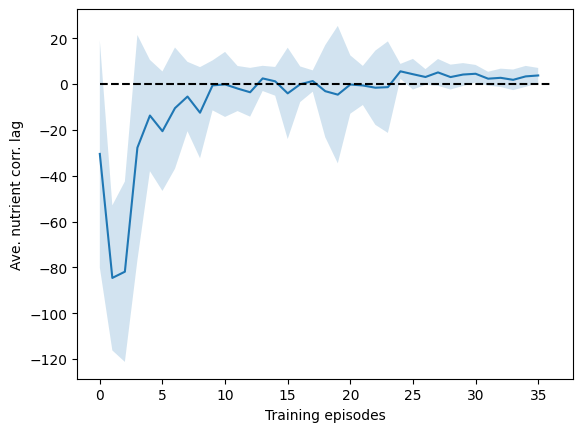

In [14]:
df_mean = df_cat.mean(axis=1)
df_std = df_cat.std(axis=1)

# plt.plot(df_cat)
plt.plot(df_mean)
plt.fill_between(range(len(df_mean)), df_mean - df_std, df_mean + df_std, alpha=0.2)
plt.hlines(y=0, xmin=0, xmax=len(df_mean), colors='k', linestyles='--')
plt.ylabel('Ave. nutrient corr. lag')
plt.xlabel('Training episodes')
plt.show()

In [15]:
# import results and concatenate

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]

# Load and concatenate them
df_cat = pd.DataFrame([])  # Store individual dataframes

for file in csv_files:
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
    df_cat = pd.concat((df_cat,df['ave_max_cross_corr_kn0']), axis=1)

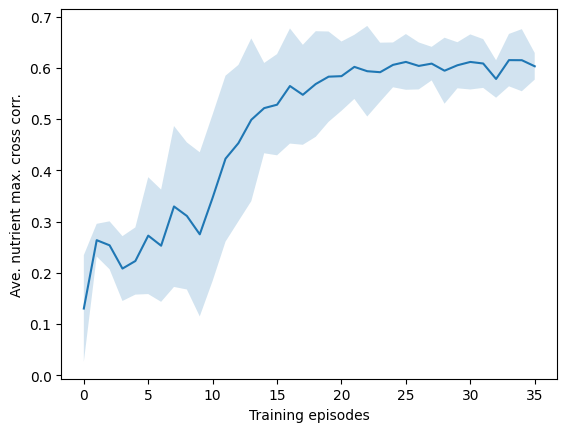

In [16]:
df_mean = df_cat.mean(axis=1)
df_std = df_cat.std(axis=1)

# plt.plot(df_cat)
plt.plot(df_mean)
plt.fill_between(range(len(df_mean)), df_mean - df_std, df_mean + df_std, alpha=0.2)
plt.ylabel('Ave. nutrient max. cross corr.')
plt.xlabel('Training episodes')
plt.show()

end training dynamics

In [34]:
# import results and concatenate

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]

# Load and concatenate them
df_list = []  # Store individual dataframes

for file in csv_files:
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
    df_list.append(df)

# Combine all dataframes into one
df = pd.concat(df_list, ignore_index=True)

In [35]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_kn0"], df["ave total reward"])
corr_coef = np.round(corr_coef[0,1], 3)

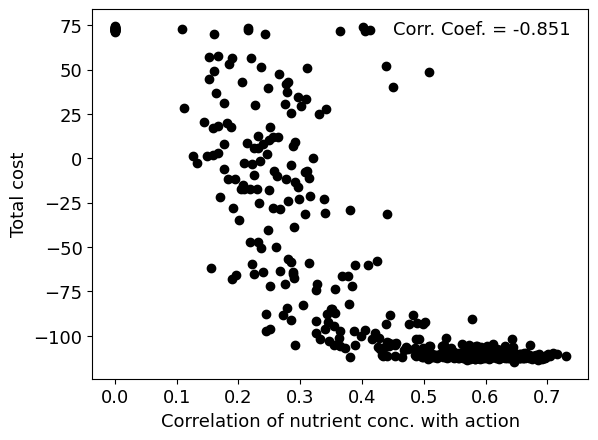

In [36]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_kn0"], df["ave total reward"], color='k')
plt.xlabel("Correlation of nutrient conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.45,70))
plt.show()
# fig.savefig('nutr_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

In [37]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_U"], df["ave total reward"])
corr_coef = np.round(corr_coef[0,1], 3)

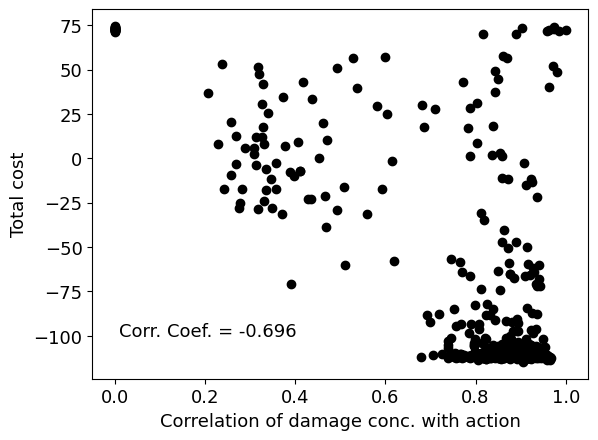

In [38]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_U"], df["ave total reward"], color='k')
plt.xlabel("Correlation of damage conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.01,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

### T=18

In [39]:
# choose project
project = "framestack_corrTest_wNoise"

# download only specific runs and metrics
filters = {
    "state": "finished",
    "config.T": {"$eq": 18}}

metrics_to_download = ["ave_max_cross_corr_kn0", "ave_max_cross_corr_U", "ave total reward"]

In [41]:
runs = api.runs(f"{entity}/{project}", filters=filters)

results_folder = f"wandb_downloads/{project}/{filters['config.T']['$eq']}"
os.makedirs(results_folder, exist_ok=True)

for run in runs:
    print(f"Downloading metrics for Run ID: {run.id}")

    # Fetch only selected metrics
    history = run.history(keys=metrics_to_download)

    # Save to CSV
    history.to_csv(f"{results_folder}/{run.id}.csv", index=False)

print("Download complete.")

Download complete.


In [42]:
# import results and concatenate

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]

# Load and concatenate them
df_list = []  # Store individual dataframes

for file in csv_files:
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
    df_list.append(df)

# Combine all dataframes into one
df = pd.concat(df_list, ignore_index=True)

In [43]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_kn0"], df["ave total reward"])
corr_coef = np.round(corr_coef[0,1], 3)

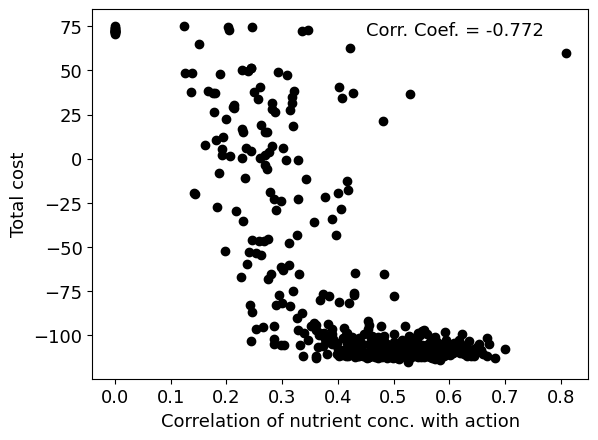

In [44]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_kn0"], df["ave total reward"], color='k')
plt.xlabel("Correlation of nutrient conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.45,70))
plt.show()
# fig.savefig('nutr_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

In [45]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_U"], df["ave total reward"])
corr_coef = np.round(corr_coef[0,1], 3)

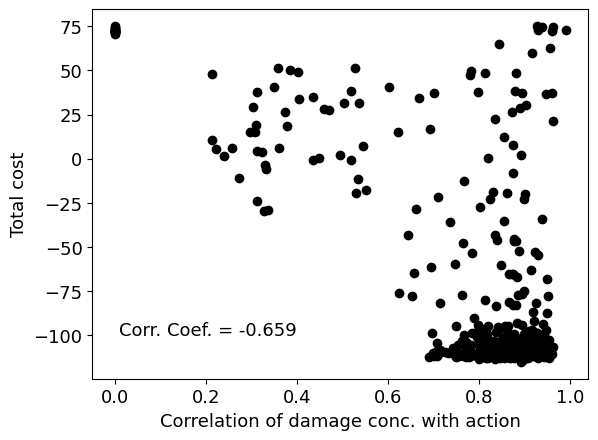

In [46]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_U"], df["ave total reward"], color='k')
plt.xlabel("Correlation of damage conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.01,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

## Deterministic nutrient profile

### T=6

In [3]:
# choose project
project = "framestack_corrTest_noNoise_final"

# download only specific runs and metrics
filters = {
    "state": "finished",
    "config.T": {"$eq": 6}}

metrics_to_download = ["ave_max_cross_corr_kn0", "ave_max_cross_corr_U", "ave total reward"]

In [48]:
runs = api.runs(f"{entity}/{project}", filters=filters)

results_folder = f"wandb_downloads/{project}/{filters['config.T']['$eq']}"
os.makedirs(results_folder, exist_ok=True)

for run in runs:
    print(f"Downloading metrics for Run ID: {run.id}")

    # Fetch only selected metrics
    history = run.history(keys=metrics_to_download)

    # Save to CSV
    history.to_csv(f"{results_folder}/{run.id}.csv", index=False)

print("Download complete.")

Download complete.


In [49]:
# import results and concatenate

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]

# Load and concatenate them
df_list = []  # Store individual dataframes

for file in csv_files:
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
    df_list.append(df)

# Combine all dataframes into one
df = pd.concat(df_list, ignore_index=True)

In [50]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_kn0"], df["ave total reward"])
corr_coef = np.round(corr_coef[0,1], 3)

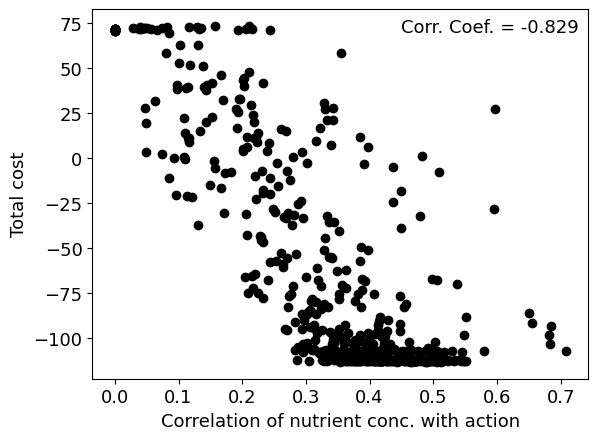

In [51]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_kn0"], df["ave total reward"], color='k')
plt.xlabel("Correlation of nutrient conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.45,70))
plt.show()
# fig.savefig('nutr_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

In [52]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_U"], df["ave total reward"])
corr_coef = np.round(corr_coef[0,1], 3)

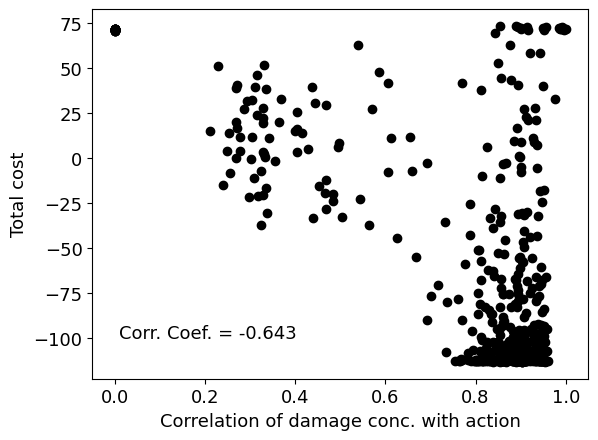

In [53]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_U"], df["ave total reward"], color='k')
plt.xlabel("Correlation of damage conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.01,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

### T=12

In [140]:
# choose project
project = "framestack_corrTest_noNoise_final"

# download only specific runs and metrics
filters = {
    "state": "finished",
    "config.T": {"$eq": 12}}

metrics_to_download = ["ave_max_cross_corr_kn0", "ave_max_cross_corr_U", "ave total reward"]

In [141]:
runs = api.runs(f"{entity}/{project}", filters=filters)

results_folder = f"wandb_downloads/{project}/{filters['config.T']['$eq']}"
os.makedirs(results_folder, exist_ok=True)

for run in runs:
    print(f"Downloading metrics for Run ID: {run.id}")

    # Fetch only selected metrics
    history = run.history(keys=metrics_to_download)

    # Save to CSV
    history.to_csv(f"{results_folder}/{run.id}.csv", index=False)

print("Download complete.")

Download complete.


In [6]:
# import results and concatenate

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]

# Load and concatenate them
df_list = []  # Store individual dataframes

for file in csv_files:
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
    df_list.append(df)

# Combine all dataframes into one
df = pd.concat(df_list, ignore_index=True)

In [7]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_kn0"], df["ave total reward"])
corr_coef = np.round(corr_coef[0,1], 3)

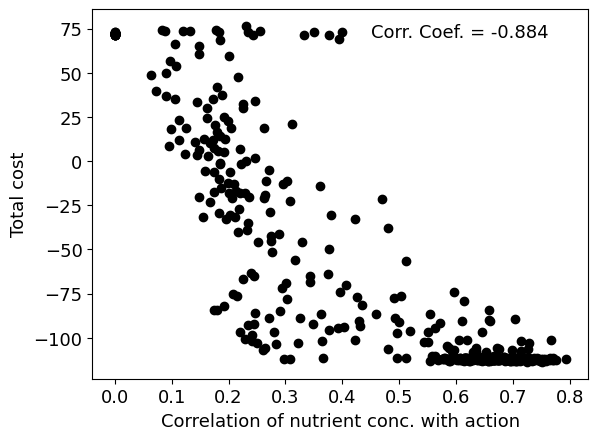

In [ ]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_kn0"], df["ave total reward"], color='k')
plt.xlabel("Correlation of nutrient conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.45,70))
plt.show()
# fig.savefig('nutr_vs_cost_plot-detr_12T.pdf', dpi=300, bbox_inches='tight')

Considering just one run

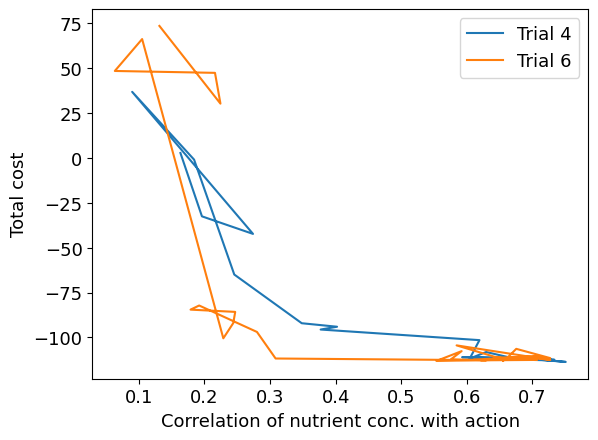

In [139]:
index = [4, 6] #4, 6

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]
csv_files = [csv_files[i] for i in index]

fig = plt.figure()

for file, i in zip(csv_files, index):
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV

    plt.plot(df["ave_max_cross_corr_kn0"], df["ave total reward"], label='Trial '+str(i))
plt.rcParams.update({"font.size": 13})

plt.xlabel("Correlation of nutrient conc. with action")
plt.ylabel("Total cost")
plt.legend()
plt.show()
fig.savefig('nutr_vs_cost_plot-detr_12T-2examp.pdf', dpi=300, bbox_inches='tight')

end single run plot

In [59]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_U"], df["ave total reward"])
corr_coef = np.round(corr_coef[0,1], 3)

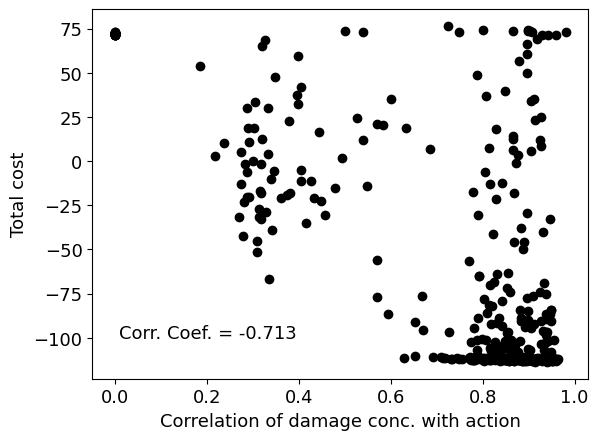

In [60]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_U"], df["ave total reward"], color='k')
plt.xlabel("Correlation of damage conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.01,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

### T=18

In [61]:
# choose project
project = "framestack_corrTest_noNoise_final"

# download only specific runs and metrics
filters = {
    "state": "finished",
    "config.T": {"$eq": 18}}

metrics_to_download = ["ave_max_cross_corr_kn0", "ave_max_cross_corr_U", "ave total reward"]

In [62]:
runs = api.runs(f"{entity}/{project}", filters=filters)

results_folder = f"wandb_downloads/{project}/{filters['config.T']['$eq']}"
os.makedirs(results_folder, exist_ok=True)

for run in runs:
    print(f"Downloading metrics for Run ID: {run.id}")

    # Fetch only selected metrics
    history = run.history(keys=metrics_to_download)

    # Save to CSV
    history.to_csv(f"{results_folder}/{run.id}.csv", index=False)

print("Download complete.")

Download complete.


In [63]:
# import results and concatenate

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]

# Load and concatenate them
df_list = []  # Store individual dataframes

for file in csv_files:
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
    df_list.append(df)

# Combine all dataframes into one
df = pd.concat(df_list, ignore_index=True)

In [64]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_kn0"], df["ave total reward"])
corr_coef = np.round(corr_coef[0,1], 3)

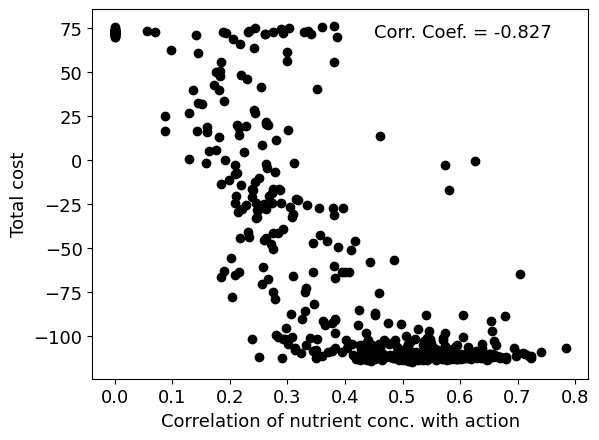

In [65]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_kn0"], df["ave total reward"], color='k')
plt.xlabel("Correlation of nutrient conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.45,70))
plt.show()
# fig.savefig('nutr_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

In [66]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_U"], df["ave total reward"])
corr_coef = np.round(corr_coef[0,1], 3)

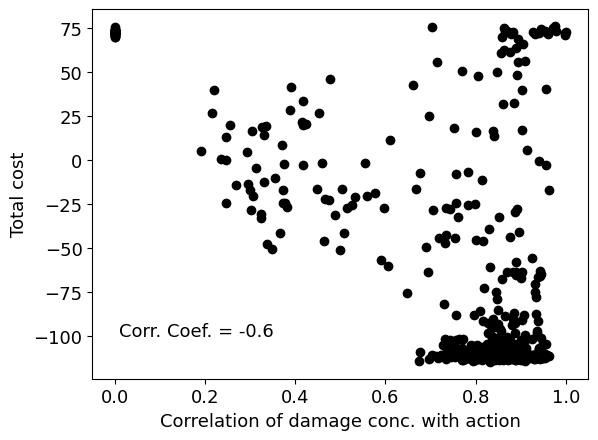

In [67]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_U"], df["ave total reward"], color='k')
plt.xlabel("Correlation of damage conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.01,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')